<a href="https://colab.research.google.com/github/luizaclara/KNNtitanic/blob/main/Trabalho_02ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/titanic/data

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked

In [1]:
import sklearn
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


1. Implementação da Função para Seleção dos k Vizinhos Mais Próximos
2. Classificação com Base nos k Vizinhos Mais Próximos

In [2]:
class KNN ():
  def __init__(self,k=3):
    self.k = k #hiperparâmetro

  def fit(self,X,y):
    dataframe = pd.DataFrame(data=X) #dados
    dataframe['value'] = y #target
    self.data = dataframe

  def predict_one(self,x):
    df = self.data
    df['distance'] = euclidean_distances(df.iloc[:,:-1], [x]) #calcular distâncias usando norma euclidiana
    df.sort_values(by='distance', inplace=True) #ordenar distâncias
    top_k = df.head(self.k) #selecionar K mais próximos (Passo 1)
    class_predict = top_k['value'].value_counts().idxmax() #pegar classe majoritária (Passo 2)
    return class_predict

  def predict(self, points):
    return [self.predict_one(p) for p in points]

    #distances = sorted(self.distance(x),lambda d:d [0])[:self.k]
    #tags_count = {} # {tag : (contagem , soma das distancias)}

    # for dist, tag in distances:
    #   if tag not in tags_count:
    #     count[tag] = (0, 0)
    #   count[tag] = (count[tag][0] + 1, count[tag][1] + dist )

    # # ordena em ordem decrescente a contagem e em ordem crescente a distância
    # sorted_count = sorted(tags_count.items(), reverse = True, key= lambda x: (x[1][0], -x[1][1]))

    # return sorted_count[0][0] # nome da categoria com mais contagem e menos distância

  # def distance(self, point):
  #   return list(zip(euclidean_distances(self.X, [point]), self.Y))


In [3]:
dataframe = pd.read_csv("titanic.csv")


3. Transformação de Features Categóricas em Numéricas

*   As features categóricas Sex e Embarked serão transformadas em numéricas, no entanto, não representam uma ordenação natural. Portanto, será aplicada **OneHotEncode** para evitar enviezar o modelo.

4. Análise da Necessidade de Normalização das Features Numéricas

*   Devido à variação de valores das features, será aplicada a **normalização** dos valores.


In [ ]:
# Transformar a coluna 'Sex' e 'Embarked' em duas colunas (Passo 3)
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(dataframe[['Sex', 'Embarked']])
encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

In [ ]:
# juntar os dataframes
dataframe = pd.concat([dataframe, encoded_dataframe])

In [ ]:
# substituir valores nulos

# preenche a idade com a média das idades
dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].mean())

#preenche o sexo com o que aparece mais vezes
# dataframe['Sex'] = dataframe['Sex'].fillna(dataframe['Sex'].mode())

# drop no 'Embarked' porque tem poucos valores NaN
dataframe.dropna(subset='Embarked', inplace=True)

In [4]:
# Normalizar (Passo 4)
for column in ['Age', 'Fare']:
    dataframe[column] = dataframe[column]  / dataframe[column].abs().max()

5. Seleção de Features com Base na Correlação

*   **PassengerId, Name, Ticket, Cabin** não agregam informações relevantes para o modelo, por se tratarem apenas de identificador, nome, número do ticket e da cabine, respectivamente. Serão dropados do dataset.

*   **Pclass, Sex, Age, SibSp, Parch, Fare e Embarked** serão considerados para o treinamento e predição do modelo.

*   **Survived** é o **target**.






In [ ]:
columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] + list(encoded_dataframe.columns)
y = ['Survived']

6. Separação do Dataset em Conjuntos de Treino, Teste e Validação

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframe[[col for col in columns]], dataframe[y], test_size=0.25, random_state=42)

In [ ]:
# testar vários valores de K
values = [] # (k, acurácia)
for k in range(1, 30, 4):
    knn = KNN(k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    values.append((k, accuracy))

7. Avaliação de Diferentes Valores de k

8. Avaliação do Melhor Modelo

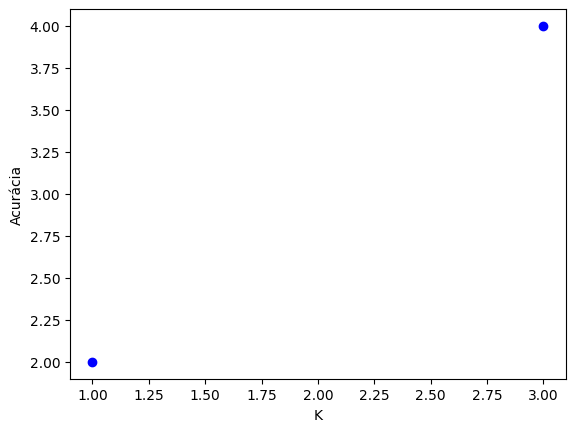

In [ ]:
# plotar em um gráfico

fig = plt.figure()
plt.xlabel('K')
plt.ylabel('Acurácia')

for x, y in values:
    plt.plot(x, y, 'bo') # bo -> circulo azul
plt.show()